# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18992668,
            "id": 1,
            "last_updated": 1648140511,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 833566803914,
                    "percent_change_1h": 0.0698253835270115,
                    "percent_change_24h": 3.20578453768273,
                    "percent_change_7d": 6.6347962996998,
                    "percentage_change_1h": 0.0698253835270115,
                    "percentage_change_24h": 3.20578453768273,
                    "percentage_change_7d": 6.6347962996998,
                    "price": 43897.0,
                    "volume_24h": 26769334564
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18992668,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies"

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120093756,
            "id": 1027,
            "last_updated": 1648140499,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 372012721780,
                    "percent_change_1h": -0.388194619260506,
                    "percent_change_24h": 3.05831755225664,
                    "percent_change_7d": 11.8606053641038,
                    "percentage_change_1h": -0.388194619260506,
                    "percentage_change_24h": 3.05831755225664,
                    "percentage_change_7d": 11.8606053641038,
                    "price": 3100.51,
                    "volume_24h": 16982630564
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120093756,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
(f"The price for BTC is ${btc_price}")


'The price for BTC is $43897.0'

In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
(f"The price for ETH is ${eth_price}")


'The price for ETH is $3100.51'

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
(f'The value of your BTC holdings is ${btc_value}')


'The value of your BTC holdings is $52676.4'

In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
(f'The value of your ETH holdings is ${eth_value:0.2f}')


'The value of your ETH holdings is $16432.70'

In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
(f'The your current crypto wallet balance is $ {total_crypto_wallet}')


'The your current crypto wallet balance is $ 69109.103'

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1D 
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-03-17", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-03-17", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df 

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-17 04:00:00+00:00,107.9,108.06,107.73,107.86,8005258,24093,107.889900,AGG
2022-03-17 04:00:00+00:00,433.7,441.07,433.19,441.07,100157174,784018,437.706981,SPY


#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number

agg_close_price = float(alpaca.get_bars('AGG', timeframe ,start=start_date, end=end_date).df['close'][0])
print(f'March 17 22 Close Price of AGG is $ {agg_close_price:0.2f}')

March 17 22 Close Price of AGG is $ 107.86


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(alpaca.get_bars('SPY', timeframe ,start=start_date, end=end_date).df['close'][0])

# Print the SPY closing price
print(f'March 17 22 Close Price of SPY is $ {spy_close_price:0.2f}')


March 17 22 Close Price of SPY is $ 441.07


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f'Current value of your bond portfolio is $ {agg_value:0.2f}')


Current value of your bond portfolio is $ 21572.00


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f'Current value of your stock portfolio is $ {spy_value:0.2f}')


Current value of your stock portfolio is $ 48517.70


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f'Current value of stocks and bonds is $ {total_stocks_bonds:0.2f}')


Current value of stocks and bonds is $ 70089.70


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
(f'Current total portfolio value is $ {total_portfolio:0.2f}')


'Current total portfolio value is $ 139198.80'

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data =[total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[69109.103, 70089.7]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    data=savings_data,
    columns=["amount"],
    index= ["crypto","stock/bond"]
)

# Display the savings_df DataFrame
savings_df


,amount
crypto,69109.103
stock/bond,70089.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Investment Portfolio'}, ylabel='amount'>

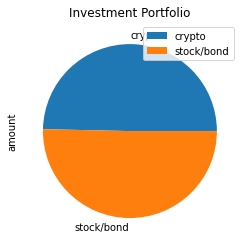

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(title="Investment Portfolio", y="amount")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3
(f'The value of your emergency fund is $ {emergency_fund_value}')

'The value of your emergency fund is $ 36000'

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f"Congrats! You have enough money in this fund!")
elif total_portfolio==emergency_fund_value:
    print(f"Congrats! You are reaching your financial goal!")
else:
    print(f"You are ${dollars_away_from_goal} from your goal")


Congrats! You have enough money in this fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [37]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2017-08-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-30", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [55]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
historical_agg_price = alpaca.get_bars('AGG', timeframe, start=start_date, end=end_date, limit=limit_rows).df

column_names = [('AGG', x) for x in historical_agg_price.columns]
historical_agg_price.columns = pd.MultiIndex.from_tuples(column_names)


# Display both the first and last five rows of the DataFrame
display(historical_agg_price.head())
display(historical_agg_price.tail())


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2017-08-30 04:00:00+00:00  110.27  110.3300  110.2400  110.30  1505746   
2017-08-31 04:00:00+00:00  110.31  110.4600  110.3100  110.45  5308381   
2017-09-01 04:00:00+00:00  110.19  110.2200  109.9100  109.97  2824636   
2017-09-05 04:00:00+00:00  110.27  110.4972  110.2100  110.42  2257109   
2017-09-06 04:00:00+00:00  110.42  110.5200  110.2301  110.30  2720188   

                                                   
                          trade_count        vwap  
timestamp                                          
2017-08-30 04:00:00+00:00        8343  110.282968  
2017-08-31 04:00:00+00:00       12864  110.394698  
2017-09-01 04:00:00+00:00       10346  110.038464  
2017-09-05 04:00:00+00:00        9512  110.379039  
2017-09-06 04:00:00+00:00       10898  110.336561

AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2021-08-13 04:00:00+00:00  115.65  115.970  115.6401  115.97  4599824   
2021-08-16 04:00:00+00:00  116.14  116.270  116.0300  116.03  3693575   
2021-08-17 04:00:00+00:00  115.98  116.090  115.9300  115.94  5468245   
2021-08-18 04:00:00+00:00  115.94  116.030  115.8000  115.95  3981800   
2021-08-19 04:00:00+00:00  116.12  116.155  116.0200  116.15  4581081   

                                                   
                          trade_count        vwap  
timestamp                                          
2021-08-13 04:00:00+00:00       14196  115.855123  
2021-08-16 04:00:00+00:00       14142  116.129334  
2021-08-17 04:00:00+00:00       13678  115.986929  
2021-08-18 04:00:00+00:00       13820  115.910223  
2021-08-19 04:00:00+00:00       17564  116.116883

In [56]:
historical_spy_price = alpaca.get_bars('SPY', timeframe, start=start_date, end=end_date, limit=limit_rows).df

column_names = [('SPY', x) for x in historical_spy_price.columns]
historical_spy_price.columns = pd.MultiIndex.from_tuples(column_names)


# Display both the first and last five rows of the DataFrame
display(historical_spy_price.head())
display(historical_spy_price.tail())


SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2017-08-30 04:00:00+00:00  244.86  246.32  244.6200  246.01   62030805   
2017-08-31 04:00:00+00:00  246.75  247.77  246.0473  247.49  103803880   
2017-09-01 04:00:00+00:00  247.98  248.33  247.6700  247.84   62006989   
2017-09-05 04:00:00+00:00  247.27  247.52  244.9500  246.06   91398777   
2017-09-06 04:00:00+00:00  246.87  247.28  246.2300  246.90   57916867   

                                                   
                          trade_count        vwap  
timestamp                                          
2017-08-30 04:00:00+00:00      198515  245.665333  
2017-08-31 04:00:00+00:00      230804  246.973042  
2017-09-01 04:00:00+00:00      180135  247.965488  
2017-09-05 04:00:00+00:00      330607  246.305181  
2017-09-06 04:00:00+00:00      216152  246.817023

SPY                                     \
                             open     high     low   close    volume   
timestamp                                                              
2021-08-13 04:00:00+00:00  445.55  445.940  445.07  445.92  40132779   
2021-08-16 04:00:00+00:00  444.60  447.110  442.87  446.97  73814275   
2021-08-17 04:00:00+00:00  444.28  444.960  440.85  444.04  92452576   
2021-08-18 04:00:00+00:00  442.93  444.625  438.92  439.18  90016677   
2021-08-19 04:00:00+00:00  436.30  441.140  436.12  439.86  92545091   

                                                   
                          trade_count        vwap  
timestamp                                          
2021-08-13 04:00:00+00:00      233549  445.541970  
2021-08-16 04:00:00+00:00      406489  445.275785  
2021-08-17 04:00:00+00:00      592797  443.563793  
2021-08-18 04:00:00+00:00      508241  441.764740  
2021-08-19 04:00:00+00:00      679054  439.099415

In [57]:
prices_merged = pd.merge(historical_spy_price,
                         historical_agg_price,
                         how = "inner",
                        left_index=True,
                         right_index=True)

In [58]:
prices_merged.head()

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2017-08-30 04:00:00+00:00  244.86  246.32  244.6200  246.01   62030805   
2017-08-31 04:00:00+00:00  246.75  247.77  246.0473  247.49  103803880   
2017-09-01 04:00:00+00:00  247.98  248.33  247.6700  247.84   62006989   
2017-09-05 04:00:00+00:00  247.27  247.52  244.9500  246.06   91398777   
2017-09-06 04:00:00+00:00  246.87  247.28  246.2300  246.90   57916867   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2017-08-30 04:00:00+00:00      198515  245.665333  110.27  110.3300  110.2400   
2017-08-31 04:00:00+00:00      230804  246.973042  110.31  110.4600  110.3100   
2017-09-01 04:00:00+00:00      180135  247.965488  110.19  110.2200  109.9100   
2017-09-05 04:00:00+00:00      330607  246.305181  110.27  110.4972  110.2100   
2017-09-06 04:00:00+00:00      216152  246.817023  110.42  110.5200  110.2301   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-08-30 04:00:00+00:00  110.30  1505746        8343  110.282968  
2017-08-31 04:00:00+00:00  110.45  5308381       12864  110.394698  
2017-09-01 04:00:00+00:00  109.97  2824636       10346  110.038464  
2017-09-05 04:00:00+00:00  110.42  2257109        9512  110.379039  
2017-09-06 04:00:00+00:00  110.30  2720188       10898  110.336561

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [59]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.

MC_thirtyyear = MCSimulation(
    portfolio_data = prices_merged,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_thirtyyear.portfolio_data


SPY                                        \
                             open     high       low   close     volume   
timestamp                                                                 
2017-08-30 04:00:00+00:00  244.86  246.320  244.6200  246.01   62030805   
2017-08-31 04:00:00+00:00  246.75  247.770  246.0473  247.49  103803880   
2017-09-01 04:00:00+00:00  247.98  248.330  247.6700  247.84   62006989   
2017-09-05 04:00:00+00:00  247.27  247.520  244.9500  246.06   91398777   
2017-09-06 04:00:00+00:00  246.87  247.280  246.2300  246.90   57916867   
...                           ...      ...       ...     ...        ...   
2021-08-13 04:00:00+00:00  445.55  445.940  445.0700  445.92   40132779   
2021-08-16 04:00:00+00:00  444.60  447.110  442.8700  446.97   73814275   
2021-08-17 04:00:00+00:00  444.28  444.960  440.8500  444.04   92452576   
2021-08-18 04:00:00+00:00  442.93  444.625  438.9200  439.18   90016677   
2021-08-19 04:00:00+00:00  436.30  441.140  436.1200  439.86   92545091   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-30 04:00:00+00:00      198515  245.665333          NaN  110.27   
2017-08-31 04:00:00+00:00      230804  246.973042     0.006016  110.31   
2017-09-01 04:00:00+00:00      180135  247.965488     0.001414  110.19   
2017-09-05 04:00:00+00:00      330607  246.305181    -0.007182  110.27   
2017-09-06 04:00:00+00:00      216152  246.817023     0.003414  110.42   
...                               ...         ...          ...     ...   
2021-08-13 04:00:00+00:00      233549  445.541970     0.001820  115.65   
2021-08-16 04:00:00+00:00      406489  445.275785     0.002355  116.14   
2021-08-17 04:00:00+00:00      592797  443.563793    -0.006555  115.98   
2021-08-18 04:00:00+00:00      508241  441.764740    -0.010945  115.94   
2021-08-19 04:00:00+00:00      679054  439.099415     0.001548  116.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2017-08-30 04:00:00+00:00  110.3300  110.2400  110.30  1505746        8343   
2017-08-31 04:00:00+00:00  110.4600  110.3100  110.45  5308381       12864   
2017-09-01 04:00:00+00:00  110.2200  109.9100  109.97  2824636       10346   
2017-09-05 04:00:00+00:00  110.4972  110.2100  110.42  2257109        9512   
2017-09-06 04:00:00+00:00  110.5200  110.2301  110.30  2720188       10898   
...                             ...       ...     ...      ...         ...   
2021-08-13 04:00:00+00:00  115.9700  115.6401  115.97  4599824       14196   
2021-08-16 04:00:00+00:00  116.2700  116.0300  116.03  3693575       14142   
2021-08-17 04:00:00+00:00  116.0900  115.9300  115.94  5468245       13678   
2021-08-18 04:00:00+00:00  116.0300  115.8000  115.95  3981800       13820   
2021-08-19 04:00:00+00:00  116.1550  116.0200  116.15  4581081       17564   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-30 04:00:00+00:00  110.282968          NaN  
2017-08-31 04:00:00+00:00  110.394698     0.001360  
2017-09-01 04:00:00+00:00  110.038464    -0.004346  
2017-09-05 04:00:00+00:00  110.379039     0.004092  
2017-09-06 04:00:00+00:00  110.336561    -0.001087  
...                               ...          ...  
2021-08-13 04:00:00+00:00  115.855123     0.003635  
2021-08-16 04:00:00+00:00  116.129334     0.000517  
2021-08-17 04:00:00+00:00  115.986929    -0.000776  
2021-08-18 04:00:00+00:00  115.910223     0.000086  
2021-08-19 04:00:00+00:00  116.116883     0.001725  

[1000 rows x 16 columns]

In [60]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\hmill\OneDrive\Desktop\Fintech\Practice\week_5\WK_5_assg\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995442,0.994857,0.998161,1.002624,0.996618,0.999778,0.999448,0.993826,0.992803,0.998946,...,0.992681,1.004205,0.999096,1.005324,1.003884,0.993945,0.997252,0.988737,1.000516,1.008586
2,0.990223,0.997646,0.989571,1.001737,1.001528,1.004237,0.998055,1.002421,0.987432,0.994049,...,0.991207,1.000053,0.995885,1.013191,0.999953,0.998990,0.987317,0.987611,0.998048,1.004994
3,0.993442,0.998434,0.981316,1.000894,1.011078,1.008131,1.000982,1.011075,1.002488,0.998967,...,0.991075,0.998186,1.000569,1.018434,1.001471,1.006128,0.991058,0.985931,0.997471,1.004446
4,0.999087,1.005112,0.985983,0.996623,1.011181,1.007905,1.000030,1.011946,0.994014,0.998200,...,0.991340,0.992069,1.005154,1.020486,1.002797,1.003859,0.990593,0.980970,0.996148,1.001771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,19.194963,7.170942,2.907104,10.040987,10.334014,2.869127,23.536234,2.856458,8.056386,3.632365,...,18.196135,8.485729,6.580786,7.897121,5.763454,6.454697,7.354137,12.162707,10.937953,9.563724
7557,19.241463,7.140112,2.909168,10.037771,10.407654,2.847299,23.343040,2.865963,8.034327,3.630541,...,18.083237,8.474705,6.558129,7.931184,5.823290,6.521581,7.342574,12.256644,10.919673,9.603988
7558,19.084321,7.182134,2.907786,10.021387,10.415944,2.849547,23.324841,2.860199,7.929808,3.643591,...,18.073438,8.491655,6.635001,7.963040,5.830197,6.531509,7.312122,12.181517,10.874850,9.567475
7559,19.056021,7.158709,2.900771,10.048828,10.353871,2.867424,23.298594,2.858458,7.881079,3.620156,...,18.103430,8.427292,6.680798,7.978506,5.859903,6.604059,7.316643,12.266124,10.839756,9.673901


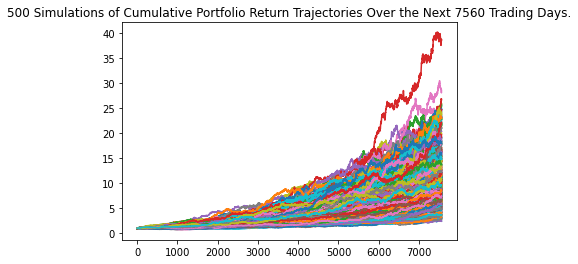

In [65]:
# Visualize the 30-year Monte Carlo simulation by creating an
line_plot = MC_thirtyyear.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

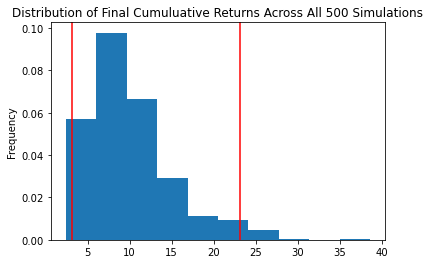

In [67]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
dist_plot = MC_thirtyyear.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [68]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
stat_sum = MC_thirtyyear.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(stat_sum)

count           500.000000
mean             10.013731
std               5.089442
min               2.408381
25%               6.442106
50%               8.897608
75%              11.914569
max              38.589283
95% CI Lower      3.185447
95% CI Upper     23.173657
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [70]:
# Print the current balance of the stock and bond portion of the members portfolio
(f'Current total portfolio value is $ {total_portfolio:0.2f}')


'Current total portfolio value is $ 139198.80'

In [73]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = stat_sum[8] * total_portfolio
ci_upper_thirty_cumulative_return = stat_sum[9] * total_portfolio

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of {total_portfolio} in the portfolio"
  f" over the next 30 years will end within in the range of"
  f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")


There is a 95% chance that an initial investment of 139198.803 in the portfolio over the next 30 years will end within in the range of $ 443410.38 and $ 3225745.29.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [75]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_tenyear = MCSimulation(
    portfolio_data = prices_merged,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_tenyear


In [76]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\hmill\OneDrive\Desktop\Fintech\Practice\week_5\WK_5_assg\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992777,0.999796,1.001723,1.004624,0.999692,1.002459,1.000242,1.000580,0.995209,1.001813,...,0.999377,1.000593,1.002821,1.006976,1.003183,0.996351,1.000970,0.997051,1.000363,1.001902
2,0.992548,0.998023,1.002227,1.004212,1.004317,1.005023,1.006637,0.998609,0.991306,1.003903,...,1.000211,0.997104,1.002737,1.001882,1.006823,0.996700,1.007512,0.996018,1.000155,1.006738
3,0.994540,1.000114,1.005333,1.001807,1.004169,1.010724,1.005433,1.001544,0.992511,1.004400,...,0.994024,0.998237,1.004673,1.004078,1.009272,0.997293,1.007950,1.000672,1.003331,1.011091
4,0.987719,0.998024,1.005644,0.997910,1.005583,1.008544,1.006320,0.992722,0.990776,1.004193,...,0.995299,0.991422,1.005035,1.000818,1.012800,0.998631,1.008206,1.003530,1.009062,1.015412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.038355,1.481319,1.667471,1.873106,1.788865,1.647464,1.238328,1.496535,1.502734,1.026802,...,1.304719,1.346883,1.606767,1.379489,1.780070,1.876713,1.309840,1.713017,1.594806,1.494341
2517,2.049631,1.483400,1.669820,1.872409,1.775168,1.645440,1.242148,1.504129,1.498935,1.026783,...,1.302375,1.348787,1.609788,1.382384,1.778308,1.882325,1.315332,1.712738,1.588452,1.496023
2518,2.063843,1.478426,1.675306,1.875250,1.785601,1.645798,1.250237,1.494300,1.495981,1.026386,...,1.312435,1.336459,1.618989,1.387266,1.783554,1.885293,1.316392,1.712047,1.583085,1.496646
2519,2.078703,1.482036,1.677982,1.882957,1.785856,1.649395,1.249434,1.498049,1.492355,1.018312,...,1.315063,1.338653,1.615556,1.383143,1.779162,1.885206,1.323304,1.717679,1.575585,1.502270


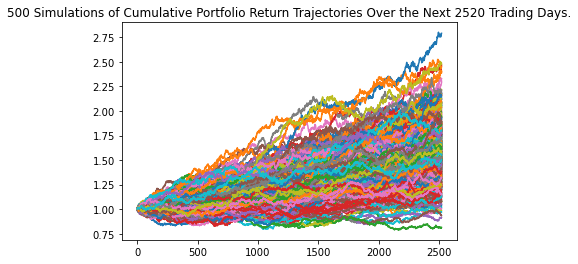

In [77]:
# Visualize the 10-year Monte Carlo simulation by creating an
ten_year_line = MC_tenyear.plot_simulation()



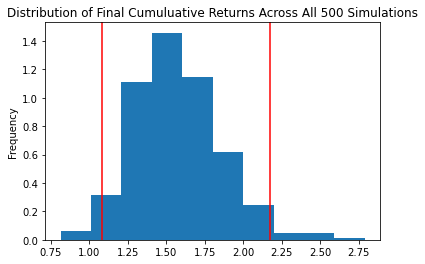

In [78]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
ten_year_dist = MC_tenyear.plot_distribution()


In [80]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
ten_year_sum = MC_tenyear.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
print(ten_year_sum)

count           500.000000
mean              1.566772
std               0.281603
min               0.814655
25%               1.377433
50%               1.534011
75%               1.749959
max               2.790740
95% CI Lower      1.081287
95% CI Upper      2.176541
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [81]:
# Print the current balance of the stock and bond portion of the members portfolio
(f'Current total portfolio value is $ {total_portfolio:0.2f}')

'Current total portfolio value is $ 139198.80'

In [87]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten = ten_year_sum [8] * total_portfolio
ci_upper_ten = ten_year_sum [9] * total_portfolio

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_portfolio} in the portolio"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower_ten: .2f} and ${ci_upper_ten: .2f}")


There is a 95% chance that an initial investment of $139198.803 in the portolio over the next 10 years will end within the range of $ 150513.90 and $ 302971.92


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [ ]:
Maybe in a foriegn country. 